In [106]:
#!pip install pandas
#!pip install os
#!pip install fastparquet
#!pip install seaborn

import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

ruta = 'C:/tmp/activity_logs'
ruta_final = 'C:/tmp/activity_logs_final'

journals = 'C:\tmp\journals'

In [8]:
#Una vez ejecutado lo dejo comentado asi no se vuelve a correr (solo hace falta correrlo 1 vez)

#for file in os.listdir(ruta):
 #   print("Procesando el archivo: " + file[:-4])
 #   df = pd.read_csv(ruta + '/' + file)
 #   df.to_parquet(ruta_final + '/' + file[:-4] + '.parquet', engine='fastparquet')

Procesando el archivo: ParticipantStatusLogs1
Procesando el archivo: ParticipantStatusLogs10
Procesando el archivo: ParticipantStatusLogs11
Procesando el archivo: ParticipantStatusLogs12
Procesando el archivo: ParticipantStatusLogs13
Procesando el archivo: ParticipantStatusLogs14
Procesando el archivo: ParticipantStatusLogs15
Procesando el archivo: ParticipantStatusLogs16
Procesando el archivo: ParticipantStatusLogs17
Procesando el archivo: ParticipantStatusLogs18
Procesando el archivo: ParticipantStatusLogs19
Procesando el archivo: ParticipantStatusLogs2
Procesando el archivo: ParticipantStatusLogs20
Procesando el archivo: ParticipantStatusLogs21
Procesando el archivo: ParticipantStatusLogs22
Procesando el archivo: ParticipantStatusLogs23
Procesando el archivo: ParticipantStatusLogs24
Procesando el archivo: ParticipantStatusLogs25
Procesando el archivo: ParticipantStatusLogs26
Procesando el archivo: ParticipantStatusLogs27
Procesando el archivo: ParticipantStatusLogs28
Procesando el a

In [107]:
#!pip install duckdb
import duckdb
con = duckdb.connect(database=':memory:')

In [3]:
con.execute("SELECT count(*) FROM read_parquet('C:/tmp/activity_logs_final/ParticipantStatusLogs*.parquet');").df()

,count_star()
0,113923735


In [11]:
# me guardo la base de logs, OJO que solo tengo los primeros 5 registros
logs = con.execute("SELECT * FROM read_parquet('C:/tmp/activity_logs_final/ParticipantStatusLogs*.parquet') LIMIT 5;").df()

In [12]:
logs

,timestamp,currentLocation,participantId,currentMode,hungerStatus,sleepStatus,apartmentId,availableBalance,jobId,financialStatus,dailyFoodBudget,weeklyExtraBudget
0,2022-03-01T00:00:00Z,POINT (-2724.6277665310454 6866.2081834436985),0,AtHome,JustAte,Sleeping,926.0,1286.519556,254,Stable,12,1104.302570
1,2022-03-01T00:00:00Z,POINT (-1526.9372331431534 5582.2951345645315),1,AtHome,JustAte,Sleeping,928.0,860.574204,929,Stable,12,926.714377
2,2022-03-01T00:00:00Z,POINT (-1360.9905987829304 2108.804385379679),2,AtHome,JustAte,Sleeping,291.0,1298.184541,348,Stable,16,848.802876
3,2022-03-01T00:00:00Z,POINT (-1558.517200825967 5600.664347152427),3,AtHome,JustAte,Sleeping,1243.0,1180.641725,316,Stable,12,819.325405
4,2022-03-01T00:00:00Z,POINT (976.2409614204214 4574.575079082071),4,AtHome,JustAte,Sleeping,194.0,-681.650588,177,Unstable,20,0.000000


In [32]:
# Descargo el CheckinJournal
con.execute("SELECT * FROM read_csv('C:/tmp/journals/CheckinJournal.csv', AUTO_DETECT=TRUE);").df()


,participantId,timestamp,venueId,venueType
0,619,2022-03-01 05:35:00,1798,Pub
1,15,2022-03-01 05:50:00,1798,Pub
2,23,2022-03-01 05:55:00,894,Pub
3,699,2022-03-01 06:00:00,1798,Pub
4,876,2022-03-01 06:00:00,1804,Restaurant
...,...,...,...,...
2100630,320,2023-05-25 00:05:00,826,Apartment
2100631,360,2023-05-25 00:05:00,768,Apartment
2100632,487,2023-05-25 00:05:00,687,Apartment
2100633,691,2023-05-25 00:05:00,1275,Apartment


In [25]:
logs1=con.execute("SELECT * FROM read_csv('C:/tmp/journals/CheckinJournal.csv', AUTO_DETECT=TRUE);").df()

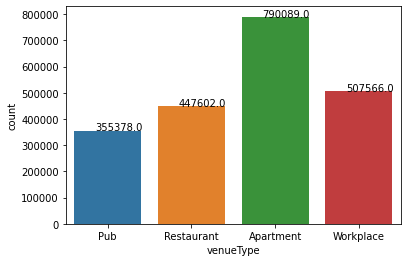

In [19]:
ax=sns.countplot(x ="venueType", data = logs1)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
# Show plot
plt.show()

In [14]:
# Descargo el FinancialJournal
con.execute("SELECT * FROM read_csv('C:/tmp/journals/FinancialJournal.csv', AUTO_DETECT=TRUE);").df()

,participantId,timestamp,category,amount
0,0,2022-03-01 00:00:00,Wage,2472.507559
1,0,2022-03-01 00:00:00,Shelter,-554.988622
2,0,2022-03-01 00:00:00,Education,-38.005380
3,1,2022-03-01 00:00:00,Wage,2046.562206
4,1,2022-03-01 00:00:00,Shelter,-554.988622
...,...,...,...,...
1856325,39,2023-05-25 00:05:00,Recreation,-2.760368
1856326,28,2023-05-25 00:05:00,Recreation,-29.458409
1856327,370,2023-05-25 00:05:00,Recreation,-28.444239
1856328,537,2023-05-25 00:05:00,Food,-4.000000


In [42]:
logs2= con.execute("SELECT * FROM read_csv('C:/tmp/journals/FinancialJournal.csv', AUTO_DETECT=TRUE);").df()

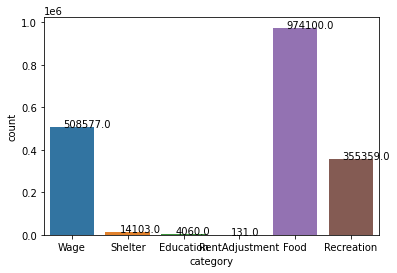

In [44]:
ax=sns.countplot(x ="category", data = logs2)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
# Show plot
plt.show()

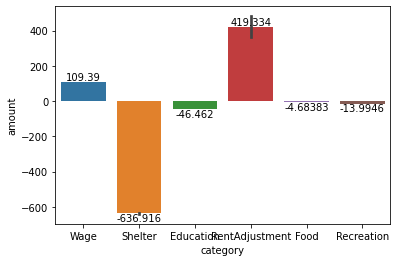

In [50]:
ay=sns.barplot(data=logs2, x="category", y="amount")
for i in ay.containers:
    ay.bar_label(i,)

In [47]:
# Descargo el SocialNetwork
con.execute("SELECT * FROM read_csv('C:/tmp/journals/SocialNetwork.csv', AUTO_DETECT=TRUE);").df()

,timestamp,participantIdFrom,participantIdTo
0,2022-03-01,173,180
1,2022-03-01,178,183
2,2022-03-01,178,185
3,2022-03-01,180,173
4,2022-03-01,183,178
...,...,...,...
7482483,2023-05-25,879,102
7482484,2023-05-25,879,851
7482485,2023-05-25,879,412
7482486,2023-05-25,879,17


In [16]:
# Descargo el TravelJournal
con.execute("SELECT * FROM read_csv('C:/tmp/journals/TravelJournal.csv', AUTO_DETECT=TRUE);").df()

,participantId,travelStartTime,travelStartLocationId,travelEndTime,travelEndLocationId,purpose,checkInTime,checkOutTime,startingBalance,endingBalance
0,23,2022-03-01 05:20:00,532,2022-03-01 05:55:00,894,Recreation (Social Gathering),2022-03-01 05:55:00,2022-03-01 06:00:00,851.223425,850.197491
1,876,2022-03-01 05:50:00,NA,2022-03-01 06:00:00,1804,Eating,2022-03-01 06:00:00,2022-03-01 06:05:00,2071.779647,2065.864612
2,902,2022-03-01 06:05:00,NA,2022-03-01 06:10:00,1801,Eating,2022-03-01 06:10:00,2022-03-01 06:15:00,2115.790341,2110.280842
3,919,2022-03-01 06:00:00,NA,2022-03-01 06:10:00,1802,Eating,2022-03-01 06:10:00,2022-03-01 06:15:00,2120.433773,2115.351009
4,154,2022-03-01 05:55:00,NA,2022-03-01 06:10:00,446,Eating,2022-03-01 06:10:00,2022-03-01 06:15:00,2246.247936,2242.074591
...,...,...,...,...,...,...,...,...,...,...
2099651,376,2023-05-24 21:15:00,1449,2023-05-24 21:50:00,1798,Recreation (Social Gathering),2023-05-24 21:50:00,2023-05-25 00:05:00,33550.317229,33512.794838
2099652,782,2023-05-24 21:30:00,1139,2023-05-24 21:55:00,1344,Recreation (Social Gathering),2023-05-24 21:55:00,2023-05-25 00:05:00,27330.385269,27307.818801
2099653,39,2023-05-24 23:30:00,188,2023-05-24 23:45:00,442,Recreation (Social Gathering),2023-05-24 23:45:00,2023-05-25 00:05:00,33845.779248,33843.018880
2099654,28,2023-05-24 21:30:00,1254,2023-05-24 22:00:00,1342,Recreation (Social Gathering),2023-05-24 22:00:00,2023-05-25 00:05:00,178896.020583,178866.562174


In [51]:
logs3=con.execute("SELECT * FROM read_csv('C:/tmp/journals/TravelJournal.csv', AUTO_DETECT=TRUE);").df()

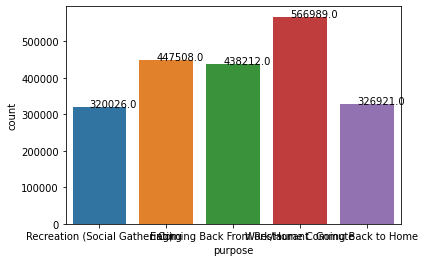

In [52]:
ax=sns.countplot(x ="purpose", data = logs3)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
# Show plot
plt.show()

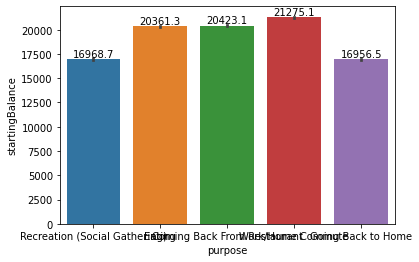

In [53]:
ay=sns.barplot(data=logs3, x="purpose", y="startingBalance")
for i in ay.containers:
    ay.bar_label(i,)

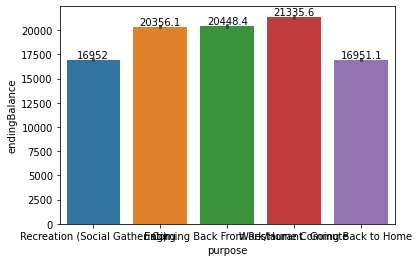

In [54]:
ay=sns.barplot(data=logs3, x="purpose", y="endingBalance")
for i in ay.containers:
    ay.bar_label(i,)

In [56]:
con.execute("SELECT * FROM read_csv('C:/tmp/attributes/Apartments.csv', AUTO_DETECT=TRUE);").df()

,apartmentId,rentalCost,maxOccupancy,numberOfRooms,location,buildingId
0,1,768.16,2,4,POINT (1077.6979444315298 648.4427163702453),340
1,2,1014.55,2,1,POINT (-185.9292838076562 1520.3270983045118),752
2,3,1057.39,4,3,POINT (2123.0141855392585 5126.753457243003),639
3,4,1259.10,4,3,POINT (2103.6301776944765 4266.932930123476),397
4,5,411.50,1,4,POINT (7.0589743819342985 79.96163671849988),628
...,...,...,...,...,...,...
1512,1729,703.80,2,4,POINT (-4097.077996668109 7409.520667070145),182
1513,1730,1104.62,4,2,POINT (-4334.244917025952 7164.441147048659),613
1514,1731,890.69,4,1,POINT (-3330.5855567286076 7588.646019451729),513
1515,1732,703.80,2,3,POINT (-4151.807872263513 7409.520667070145),182


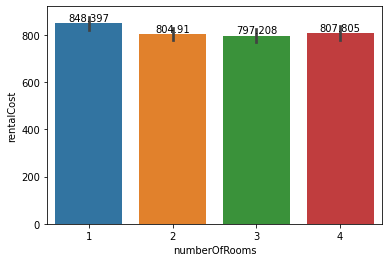

In [59]:
ay=sns.barplot(data=logs4, x="numberOfRooms", y="rentalCost")
for i in ay.containers:
    ay.bar_label(i,)


In [60]:
con.execute("SELECT * FROM read_csv('C:/tmp/attributes/Buildings.csv', AUTO_DETECT=TRUE);").df()

,buildingId,location,buildingType,maxOccupancy,units
0,1,"POLYGON ((350.0638997002585 4595.665606173783,...",Commercial,NaN,NaN
1,2,POLYGON ((-1926.972613718425 2725.610686806701...,Residental,12.0,"[481,498,534,652,818]"
2,3,"POLYGON ((685.6846002015491 1552.131491805318,...",Commercial,NaN,[382]
3,4,"POLYGON ((-976.7845160060303 4542.38209636188,...",Commercial,NaN,NaN
4,5,POLYGON ((1259.3061988755617 3572.726728111263...,Residental,2.0,[231]
...,...,...,...,...,...
1037,1038,POLYGON ((361.2332515102781 4376.8840047388585...,Residental,8.0,"[118,287]"
1038,1039,POLYGON ((1011.5463728925471 362.9701764035531...,Residental,2.0,[365]
1039,1040,POLYGON ((-3562.8074734172264 7362.92295511692...,Residental,5.0,"[1406,1564,1569]"
1040,1041,POLYGON ((-4151.699758553839 5418.613349758049...,Commercial,NaN,[1737]


In [61]:
logs5= con.execute("SELECT * FROM read_csv('C:/tmp/attributes/Buildings.csv', AUTO_DETECT=TRUE);").df()

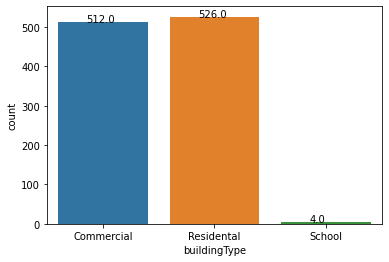

In [62]:
ax=sns.countplot(x ="buildingType", data = logs5)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
# Show plot
plt.show()

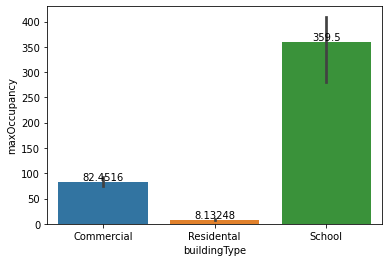

In [65]:
ay=sns.barplot(data=logs5, x="buildingType", y="maxOccupancy")
for i in ay.containers:
    ay.bar_label(i,)


In [67]:
con.execute("SELECT * FROM read_csv('C:/tmp/attributes/Employers.csv', AUTO_DETECT=TRUE);").df()

,employerId,location,buildingId
0,379,POINT (-1849.997168394888 1744.6010147106394),823
1,380,POINT (41.51783767879146 418.7264799744545),154
2,381,POINT (877.2786575380362 1358.5441805909259),279
3,382,POINT (670.3987400004884 1584.4743462106067),3
4,383,POINT (829.9556783260775 2163.4803049897623),146
...,...,...,...
248,1793,POINT (-3313.211912858075 6185.8337275541235),738
249,1794,POINT (-3786.373075235378 4999.485452069126),802
250,1795,POINT (-3267.606054814424 6452.56705940432),953
251,1796,POINT (-3725.261225376805 6345.551342169127),1011


In [68]:
con.execute("SELECT * FROM read_csv('C:/tmp/attributes/jobs.csv', AUTO_DETECT=TRUE);").df()

,jobId,employerId,hourlyRate,startTime,endTime,daysToWork,educationRequirement
0,0,379,10.000000,7:46:00 AM,3:46:00 PM,"[Monday,Tuesday,Wednesday,Thursday,Friday]",HighSchoolOrCollege
1,1,379,22.217633,7:31:00 AM,3:31:00 PM,"[Monday,Tuesday,Wednesday,Thursday,Friday]",Bachelors
2,2,380,10.000000,8:00:00 AM,4:00:00 PM,"[Monday,Tuesday,Wednesday,Thursday,Friday]",Bachelors
3,3,380,15.312071,7:39:00 AM,3:39:00 PM,"[Monday,Tuesday,Wednesday,Thursday,Friday]",Bachelors
4,4,381,21.355409,7:53:00 AM,3:53:00 PM,"[Monday,Tuesday,Wednesday,Thursday,Friday]",HighSchoolOrCollege
...,...,...,...,...,...,...,...
1323,1323,1796,37.166553,7:29:00 AM,3:29:00 PM,"[Monday,Tuesday,Wednesday,Thursday,Friday]",Graduate
1324,1324,1796,23.815211,8:14:00 AM,4:14:00 PM,"[Friday,Saturday,Thursday,Monday,Wednesday]",Bachelors
1325,1325,1797,13.117569,7:37:00 AM,3:37:00 PM,"[Monday,Tuesday,Wednesday,Thursday,Friday]",HighSchoolOrCollege
1326,1326,1797,10.000000,7:31:00 AM,3:31:00 PM,"[Monday,Tuesday,Wednesday,Thursday,Friday]",HighSchoolOrCollege


In [70]:
logs6=con.execute("SELECT * FROM read_csv('C:/tmp/attributes/jobs.csv', AUTO_DETECT=TRUE);").df()

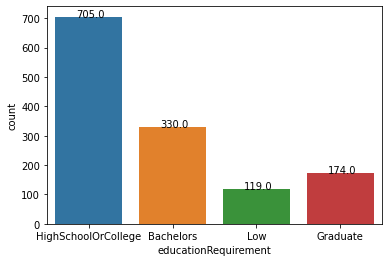

In [71]:
ax=sns.countplot(x ="educationRequirement", data = logs6)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
# Show plot
plt.show()

In [78]:
logs7=con.execute("SELECT avg(hourlyRate) as average, educationRequirement FROM read_csv('C:/tmp/attributes/jobs.csv', AUTO_DETECT=TRUE) group by educationRequirement;").df()

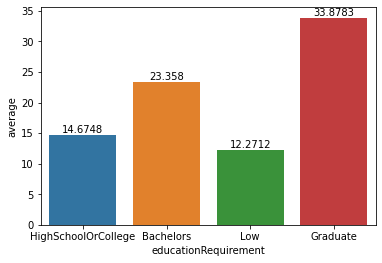

In [79]:
ay=sns.barplot(data=logs7, x="educationRequirement", y="average")
for i in ay.containers:
    ay.bar_label(i,)

In [80]:
con.execute("SELECT * FROM read_csv('C:/tmp/attributes/Participants.csv', AUTO_DETECT=TRUE);").df()

,participantId,householdSize,haveKids,age,educationLevel,interestGroup,joviality
0,0,3,True,36,HighSchoolOrCollege,H,0.001627
1,1,3,True,25,HighSchoolOrCollege,B,0.328087
2,2,3,True,35,HighSchoolOrCollege,A,0.393470
3,3,3,True,21,HighSchoolOrCollege,I,0.138063
4,4,3,True,43,Bachelors,H,0.857397
...,...,...,...,...,...,...,...
1006,1006,1,False,19,HighSchoolOrCollege,J,0.639268
1007,1007,1,False,40,HighSchoolOrCollege,B,0.934348
1008,1008,1,False,23,Graduate,C,0.163721
1009,1009,1,False,39,Low,B,0.828330


In [82]:
logs8 = con.execute("SELECT * FROM read_csv('C:/tmp/attributes/Participants.csv', AUTO_DETECT=TRUE);").df()

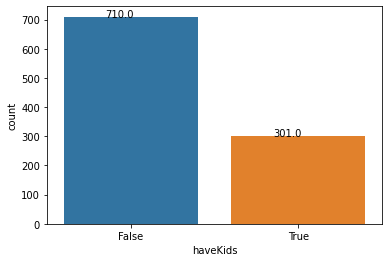

In [83]:
ax=sns.countplot(x ="haveKids", data = logs8)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
# Show plot
plt.show()

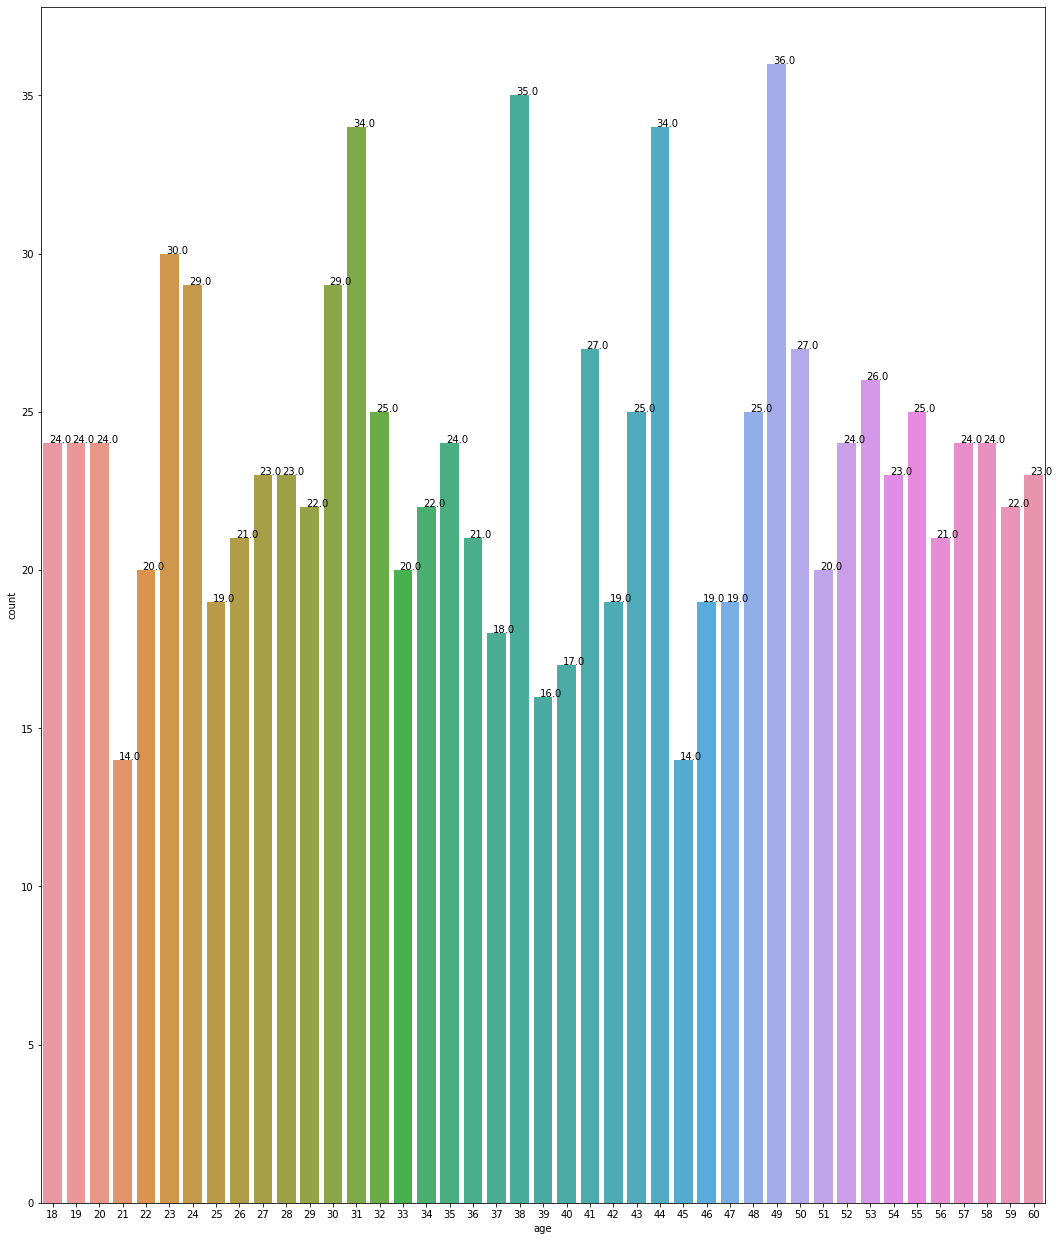

In [88]:
fig, ax = plt.subplots(figsize=(18, 22))
ax=sns.countplot(x ="age", data = logs8)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
# Show plot
plt.show()

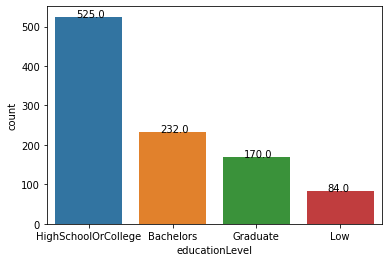

In [85]:
ax=sns.countplot(x ="educationLevel", data = logs8)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
# Show plot
plt.show()

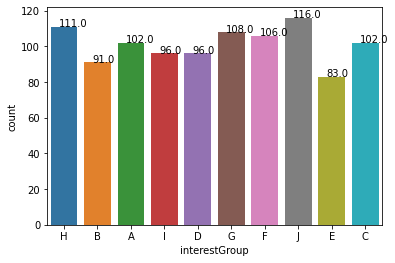

In [86]:
ax=sns.countplot(x ="interestGroup", data = logs8)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
# Show plot
plt.show()

In [110]:
logs9=con.execute("SELECT avg(joviality) as average, educationLevel FROM read_csv('C:/tmp/attributes/Participants.csv', AUTO_DETECT=TRUE) group by educationLevel;").df()

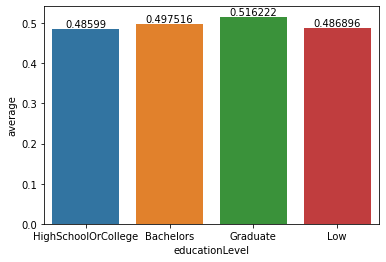

In [112]:
ay=sns.barplot(data=logs9, x="educationLevel", y="average")
for i in ay.containers:
    ay.bar_label(i,)

In [109]:
con.execute("SELECT * FROM read_csv('C:/tmp/attributes/Pubs.csv', AUTO_DETECT=TRUE);").df()

,pubId,hourlyCost,maxOccupancy,location,buildingId
0,442,8.281103,64,POINT (964.4380231713202 3991.603473784208),556
1,443,6.417435,64,POINT (1809.880173357865 4339.172426035451),29
2,444,12.581806,84,POINT (770.4279044387976 932.5852003214752),1012
3,892,11.642905,96,POINT (-1524.9573211662105 3815.271490114369),502
4,893,14.840473,79,POINT (-1608.766411449925 3886.4924784954583),164
5,894,12.311210,72,POINT (-1702.5378155541193 3865.477090848479),238
6,1342,14.140037,77,POINT (-260.45747053139064 5026.150804179361),429
7,1343,10.524972,67,POINT (-501.42676062779447 3551.572638649489),489
8,1344,10.415293,60,POINT (-225.9209866450221 3878.053697626113),585
9,1798,11.545351,64,POINT (-3209.738139187618 6487.657688065099),953


In [93]:
logs10=con.execute("SELECT * FROM read_csv('C:/tmp/attributes/Pubs.csv', AUTO_DETECT=TRUE);").df()

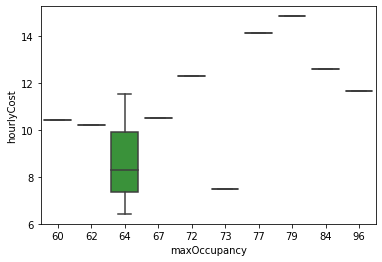

In [101]:
ay=sns.boxplot(data=logs10, x="maxOccupancy", y="hourlyCost")
for i in ay.containers:
    ay.bar_label(i,)

In [121]:
logs11=con.execute("SELECT hourlyCost, maxOccupancy FROM read_csv('C:/tmp/attributes/Pubs.csv', AUTO_DETECT=TRUE) where maxOccupancy <> 64;").df()

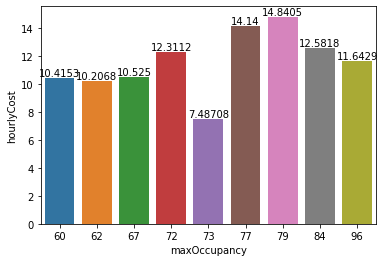

In [125]:

ay=sns.barplot(data=logs11, x="maxOccupancy", y="hourlyCost")
for i in ay.containers:
    ay.bar_label(i,)

In [127]:
con.execute("SELECT * FROM read_csv('C:/tmp/attributes/Restaurants.csv', AUTO_DETECT=TRUE);").df()

,restaurantId,foodCost,maxOccupancy,location,buildingId
0,445,5.15,71,POINT (631.5130723031391 2001.4772026036535),304
1,446,4.17,82,POINT (413.840000705876 1194.128694228948),308
2,447,5.87,119,POINT (497.9967937001494 1624.515148185587),58
3,448,4.07,98,POINT (698.2411158717262 4392.416668183332),964
4,449,5.11,53,POINT (1407.7107695149243 4010.4574815269225),181
5,895,4.44,103,POINT (-1623.0740591441258 3872.0300113645017),164
6,896,5.86,107,POINT (-2126.1723943111892 4285.182228265561),619
7,897,5.76,104,POINT (-1989.63526350385 3368.764837974986),875
8,898,4.22,115,POINT (-1771.452216635636 4343.580176583138),917
9,899,5.65,85,POINT (-820.9290279479601 4497.243308530136),86


In [ ]:
logs12=con.execute("SELECT * FROM read_csv('C:/tmp/attributes/Restaurants.csv', AUTO_DETECT=TRUE);").df()

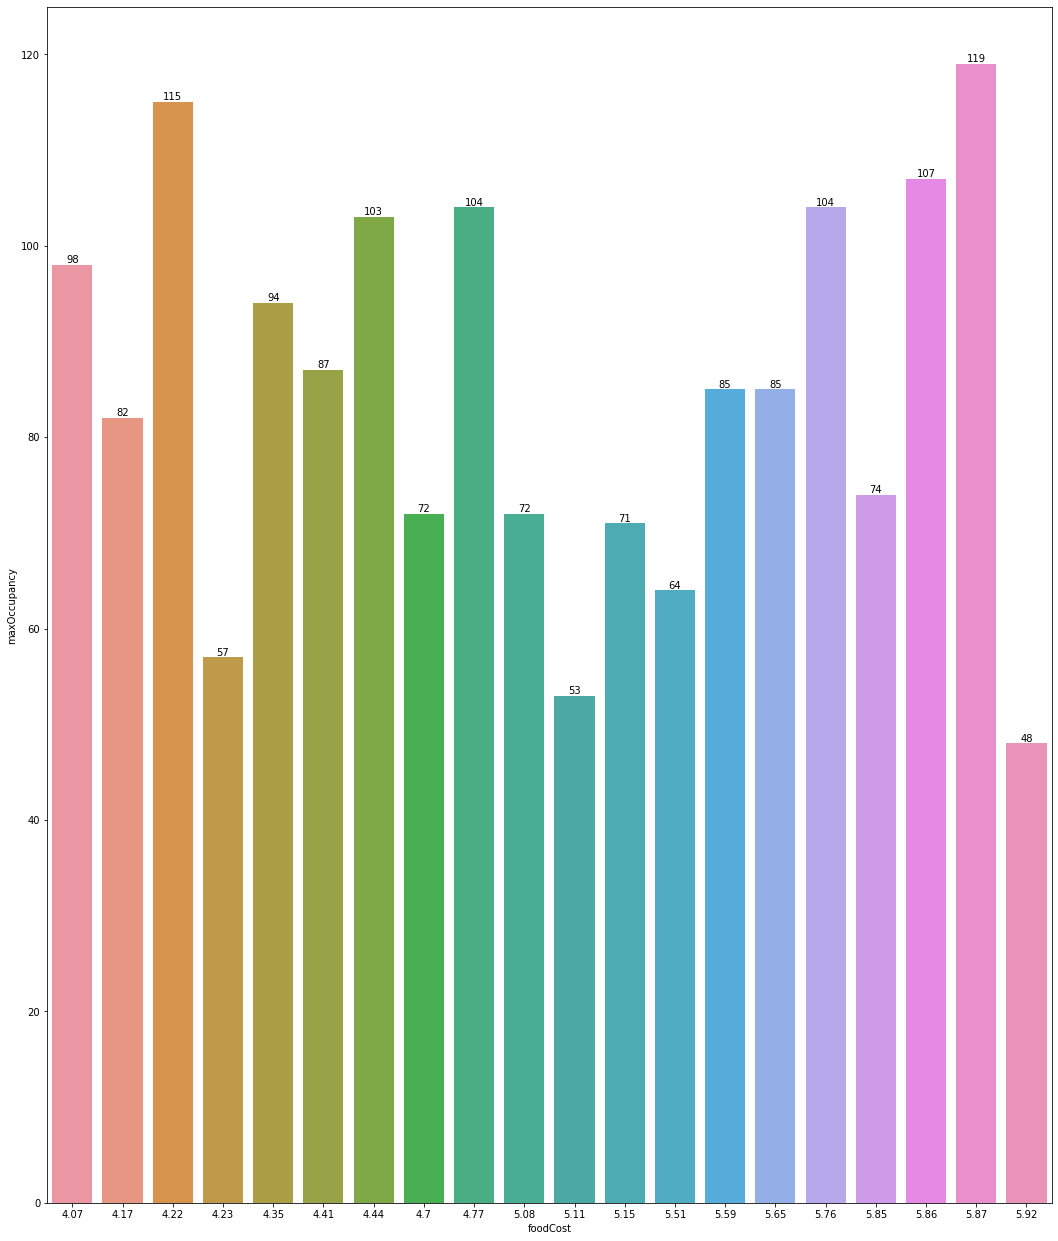

In [129]:
fig, ax = plt.subplots(figsize=(18, 22))
ay=sns.barplot(data=logs12, x="foodCost", y="maxOccupancy")
for i in ay.containers:
    ay.bar_label(i,)

In [130]:
con.execute("SELECT * FROM read_csv('C:/tmp/attributes/Schools.csv', AUTO_DETECT=TRUE);").df()

,schoolId,monthlyCost,maxEnrollment,location,buildingId
0,0,12.812445,242,POINT (-376.7505037068263 1607.9843212558562),662
1,450,91.143514,418,POINT (-2597.447677094323 3194.1547530883445),943
2,900,38.005380,394,POINT (-2539.1584040534744 6556.0323181733565),262
3,1350,73.197852,384,POINT (-4701.462928834322 5141.762936081409),123


In [132]:
logs13=con.execute("SELECT * FROM read_csv('C:/tmp/attributes/Schools.csv', AUTO_DETECT=TRUE);").df()

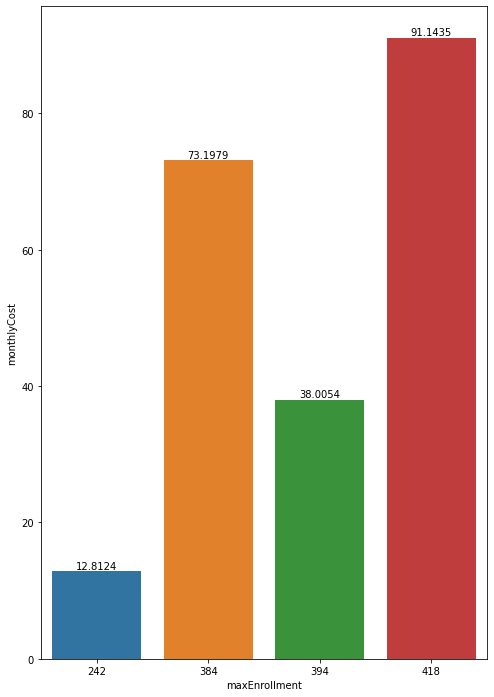

In [135]:
fig, ax = plt.subplots(figsize=(8, 12))
ay=sns.barplot(data=logs13, x="maxEnrollment", y="monthlyCost")
for i in ay.containers:
    ay.bar_label(i,)